In [1]:
%load_ext autoreload
%autoreload 2

import builtins  # Not needed unless saving for github
builtins.use_bokeh_screenshot = True  # Not needed unless saving for github
from kaggle_speech_recog import *

# from bokeh.io import output_notebook
# output_notebook()

h:\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Get feature matrix

In [2]:
X_vector_len = 16000
test = SpeechList.get_test('../data/test/audio')
X_test = test.get_spectrogram_feature_ndarray(vector_len=X_vector_len, spec_v='3', take_log=False)

h:\python35\lib\site-packages\librosa\filters.py:261: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


# Predict

In [3]:
path2log = 'logs/SpectrogramMultiLSTMRandomInputModify2_graph_02_lower_lr_lr_decay_run_01_group_unknown.log'

In [4]:
log = pickle.load(open(path2log, 'rb'))
if hasattr(log.t_cnfg, 'ensemble_logs'):
    L_test = gather_logits(X_test, log_dir='logs', logs=log.t_cnfg.ensemble_logs)
GraphClass = globals()[log.graph_name]  # Pick up graph class used to train model
graph = GraphClass(log.g_cnfg)  # Load the same graph configuration
if hasattr(log.t_cnfg, 'ensemble_logs'):
    Y_test = graph.predict(L_test, ckp_dir=log.ckp_dir, batch_size=log.t_cnfg.batch_size)  # Use best model in checkpoint directory
else:
    Y_test = graph.predict(X_test, ckp_dir=log.ckp_dir, batch_size=log.t_cnfg.batch_size)  # Use best model in checkpoint directory
test.add_predicted_label(Y_test, le=log.t_cnfg.le)


self.X:  (?, 128, 71)
self.Y:  (?, 2)
INFO:tensorflow:Restoring parameters from checkpoints/SpectrogramMultiLSTMRandomInputModify2_graph_02_lower_lr_lr_decay_run_01_group_unknown/best\model-24
Predicting starts @ 04/08/2018 14:44:59
Predicting ends @ 04/08/2018 14:47:15


h:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [5]:
test.save_submission_csv(dir_='submissions', name=log.joined_name+'.csv')

None, ../data/test/audio/clip_00ad8a1b1.wav, sample rate 16000, data length 16000
prediction: _background_noise_


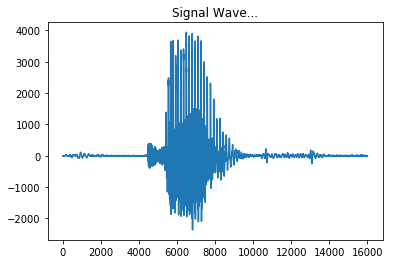

In [8]:
test[40].hear_and_see()  # 51511, 120099, 1234, 98765, 119965